### Youmin Ko

### CO2 Emission Dataset from Kaggle

**Summary**: The CO2 emissions dataset provides a comprehensive overview of the amount of CO2 emitted by each country. The dataset includes information on CO2 emissions by country from 1960 to 2020. It covers all countries world and  is compiled from various sources.

**Original Source**: The International Energy Agency(**IEA**) and the United Nations Framework Convetion on Climate Change(**UNFCCC**) are provied this dataset which can be used by researchers, policymakers, and the general public to gain insight into the relative contributions of different countries to global CO2 emissions. 

It can also be used to monitor changes in emissions over time and to assess the effectiveness of climate policies.

Overall, the CO2 emissions dataset is an important resource for understanding the global climate challenge and for developing strategies to mitigate the impact of CO2 emissions on our planet.

### Columns and Definitions:
- country_code: country code     e.g. United States of America $\rightarrow$ USA
- country_name: country name    e.g. Republic of South Korea $\rightarrow$ Korea, Rep.
- year
- value: CO2 Emission in kiloton(kt)

In [ ]:
# Installing Packages
# pip install plotly
# pip install numpy 
# pip install matplotlib
# pip install pandas

### Import python libraries and load the data

In [ ]:
## Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
sns.set()


plt.close('all')

## Data Load
dfLoad = pd.read_csv("https://raw.githubusercontent.com/meaningful96/DSKUS_Project/main/Dataset/1_CO2_Emission.csv")

co2 = dfLoad 
print(co2.describe())
print()
print(co2.info())

               year         value
count  13953.000000  1.395300e+04
mean    1990.732316  8.254983e+05
std       17.187585  2.788923e+06
min     1960.000000 -8.067400e+01
25%     1976.000000  1.100000e+03
50%     1992.000000  1.390000e+04
75%     2006.000000  1.642779e+05
max     2019.000000  3.434401e+07

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB
None


### Data Cleaning

#### Groupby 
<p align="center">
<img width="600" alt="1" src="https://raw.githubusercontent.com/meaningful96/DSKUS_Project/main/png/groupby.png">
</p>

In [ ]:
## Grpupby 
# groupby = Seperate them based on 'country name' 
# and reorganize in each seperated blocks by summation of values
co2_group = co2.groupby('country_name')['value'].max().sort_values(ascending=False).head(50)

In [ ]:
## Cleaning
# We can see that data set contain country name, redion, incom_type, IDA, IVRD and other combinations
# we need to segrigate so that we can have data sets only containes countries, regions, income type and others

## Region
# '.unique()' is used to get a list of unique values in an array or series. 
# The method filters out all the duplicate values and returns only the unique values.

# '.str.contains()' is used to check whether a pattern or a substring exists within a string, 
# and returns a boolean value of True or False accordingly.
asia = co2[co2['country_name'].str.contains('Asia')]['country_name'].unique()
caribbean = co2[co2['country_name'].str.contains('Caribbean')]['country_name'].unique()
africa = co2[co2['country_name'].str.contains('Africa')]['country_name'].unique()
africa = africa[africa != 'South Africa']
europe = co2[co2['country_name'].str.contains('Euro')]['country_name'].unique()
North_America = co2[co2['country_name'].str.contains('North America')]['country_name'].unique()

## Demographic
demographic = co2[co2['country_name'].str.contains('demo')]['country_name'].unique()

<p align="center">
<img width="600" alt="1" src="https://raw.githubusercontent.com/meaningful96/DSKUS_Project/main/png/Income.png">
</p>

In [ ]:
## Income
income = co2[co2['country_name'].str.contains('income')]['country_name'].unique()
ida = co2[co2['country_name'].str.contains('IDA')]['country_name'].unique()
ibrd = co2[co2['country_name'].str.contains('IBRD')]['country_name'].unique()
other_regions = ['World', 
                 'Europe', 
                 'South Asia', 
                 'OECD members', 
                 'Euro area', 
                 'Arab World', 
                 'Heavily indebted poor countries (HIPC)',
                 'Small states','Other small states' , 
                 'Fragile and conflict affected situations', 
                 'Least developed countries: UN classification', 
                 'Pacific island small states']
groups = np.concatenate((asia, europe, caribbean, africa, demographic, ida, ibrd,income, other_regions))
co2_countries= co2.query("country_name not in @groups").copy()

### Visualization using Matplotlib Library

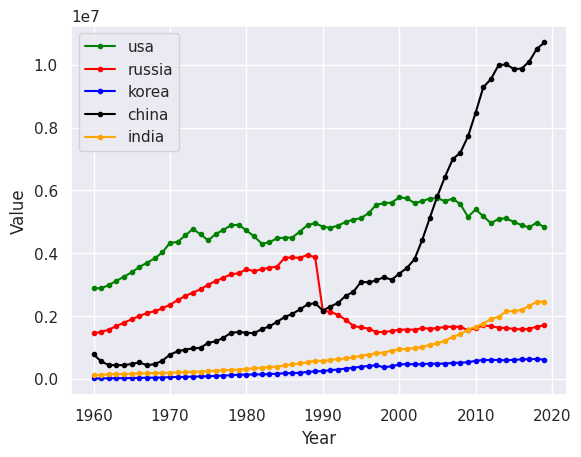

In [ ]:
usa = co2_countries[co2_countries['country_name']=='United States']
russia = co2_countries[co2_countries['country_name']=='Russian Federation']
korea = co2_countries[co2_countries['country_name']=='Korea, Rep.']
china = co2_countries[co2_countries['country_name']=='China']
india = co2_countries[co2_countries['country_name']== 'India']

plt.plot(usa.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'green',label = 'usa', marker = '.')
plt.plot(russia.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'red',label = 'russia', marker = '.')
plt.plot(korea.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'blue',label = 'korea', marker = '.')
plt.plot(china.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'black',label = 'china', marker = '.')
plt.plot(india.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'orange',label = 'india', marker = '.')
plt.xlabel(xlabel = 'Year')
plt.ylabel(ylabel = 'Value')
plt.legend(loc = 'best')

### Visualization using barplot

<Axes: xlabel='country_name', ylabel='value'>

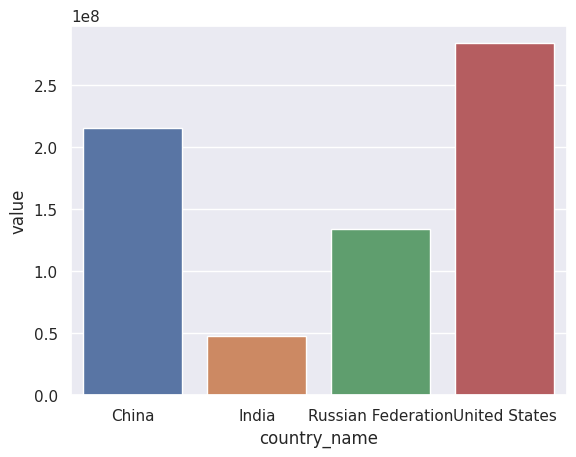

In [ ]:
data = co2_countries.groupby('country_name')['value'].sum().reset_index()
sns.barplot(data= data[data['country_name'].isin(['United States', 'China', 'Russian Federation','India'])],x= 'country_name',y='value')

### Visualization using Plotly Library

In [ ]:
import plotly.express as px

fig = px.choropleth(co2_countries, locations='country_code',
                    animation_frame='year', animation_group='country_name',
                    color='value', 
                    hover_name='country_name',
                    hover_data=['year', 'country_name', 'value'],
                    color_continuous_scale=px.colors.sequential.dense)
fig.show()